<a href="https://colab.research.google.com/github/geocarvalho/tutoriais/blob/main/ml/pycaret_first_impression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Um teste com AutoML usando PyCaret

* PyCaret é uma biblioteca aberta com baixo uso de código em Python. Ela permite que você prepare seus dados e desenvolva um modelo em poucos segundos.
* Para saber mais sobre o que é usado, vá em https://pycaret.org/


In [ ]:
!pip install pycaret

     |████████████████████████████████| 256kB 4.2MB/s 
     |████████████████████████████████| 14.2MB 306kB/s 
     |████████████████████████████████| 174kB 42.5MB/s 
     |████████████████████████████████| 102kB 9.1MB/s 
     |████████████████████████████████| 1.8MB 35.9MB/s 
     |████████████████████████████████| 276kB 50.8MB/s 
     |████████████████████████████████| 157.5MB 88kB/s 
     |████████████████████████████████| 6.8MB 44.0MB/s 
     |████████████████████████████████| 1.7MB 37.4MB/s 
     |████████████████████████████████| 65.8MB 116kB/s 
     |████████████████████████████████| 245kB 55.4MB/s 
     |████████████████████████████████| 61kB 6.9MB/s 
     |████████████████████████████████| 1.1MB 32.0MB/s 
     |████████████████████████████████| 163kB 43.7MB/s 
     |████████████████████████████████| 153kB 49.2MB/s 
     |████████████████████████████████| 81kB 7.9MB/s 
     |████████████████████████████████| 348kB 51.1MB/s 
     |████████████████████████████████| 2.1MB 37.9MB/s

In [ ]:
import pycaret.classification as pc
import pandas as pd
import pycaret

# Abrindo o dataset de exemplo.

* Vamos usar uns dados bem simples, só para testar a bibliotca.
* [Heart failure clinical records Data Set](https://archive.ics.uci.edu/ml/datasets/Heart+failure+clinical+records)

In [ ]:
data_url = "https://raw.githubusercontent.com/lorenzodenisi/Heart-Failure-Clinical-Records/master/heart_failure_clinical_records_dataset.csv"
data_df = pd.read_csv(data_url)
data_df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [ ]:
data_df.shape

(299, 13)

In [ ]:
# Checar por valores faltantes
data_df.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

In [ ]:
# Olhar todas as colunas, para saber qual indicaremos como classe de interesse
data_df.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')

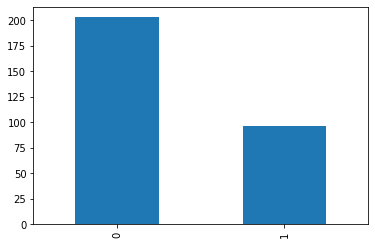

In [ ]:
# Verificar se os dados estão desbalanceados
data_df["DEATH_EVENT"].value_counts().plot(kind="bar")

# Usando PyCaret, finalmente.

* Importamos o `pycaret.classification` por ser um problema simple de classificação.

In [ ]:
# Métodos e atributos disponíveis
dir(pc)

['Any',
 'Dict',
 'Display',
 'List',
 'MLUsecase',
 'Optional',
 'Tuple',
 'Union',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__',
 'add_metric',
 'automl',
 'blend_models',
 'calibrate_model',
 'compare_models',
 'create_model',
 'deploy_model',
 'enable_colab',
 'ensemble_model',
 'evaluate_model',
 'finalize_model',
 'get_config',
 'get_logs',
 'get_metrics',
 'interpret_model',
 'io',
 'is_in_colab',
 'load_config',
 'load_model',
 'models',
 'np',
 'optimize_threshold',
 'pd',
 'plot_model',
 'predict_model',
 'pull',
 'pycaret',
 'remove_metric',
 'save_config',
 'save_model',
 'set_config',
 'setup',
 'stack_models',
 'traceback',
 'tune_model',
 'warnings']

In [ ]:
# Inicializar o ambiente
from pycaret.utils import enable_colab
enable_colab()

Colab mode enabled.


In [ ]:
clf = pc.setup(data=data_df, target="DEATH_EVENT")

,Description,Value
0,session_id,7766
1,Target,DEATH_EVENT
2,Target Type,Binary
3,Label Encoded,"0: 0, 1: 1"
4,Original Data,"(299, 13)"
5,Missing Values,False
6,Numeric Features,6
7,Categorical Features,6
8,Ordinal Features,False
9,High Cardinality Features,False


In [ ]:
# Para ignorar alguma coluna basta:
# pc.setup(data=data_df, target="DEATH_EVENT", ignore_features=["age", "diabetes"])

# Vamos comparar vários modelos e suas métricas de acurácia

* Semelhante a um relatório de classificação, AUC, F1-score.
* Para problemas de classificação:

> Relatório de classificação;

> AUC, Recall, Precision, F1-score, Kappa.

* Para problemas de regressão:

> MAE, MSE, RMSE, R2, RMSLE e MAPE.

In [ ]:
# Comparando os modelos
pc.compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.8367,0.9064,0.6619,0.8389,0.7260,0.6131,0.6318,0.494
xgboost,Extreme Gradient Boosting,0.8269,0.8844,0.6905,0.7937,0.7245,0.6009,0.6141,1.106
catboost,CatBoost Classifier,0.8219,0.8995,0.6595,0.7946,0.7058,0.5809,0.5969,1.104
dt,Decision Tree Classifier,0.8133,0.7831,0.6929,0.7455,0.6961,0.5658,0.5832,0.019
lightgbm,Light Gradient Boosting Machine,0.8124,0.8802,0.7048,0.7533,0.7102,0.5739,0.5884,0.039
ridge,Ridge Classifier,0.7986,0.0000,0.6333,0.7162,0.6608,0.5220,0.5311,0.020
lr,Logistic Regression,0.7936,0.8309,0.6000,0.7305,0.6497,0.5062,0.5173,0.328
ada,Ada Boost Classifier,0.7936,0.8569,0.6310,0.7143,0.6622,0.5151,0.5232,0.110
gbc,Gradient Boosting Classifier,0.7936,0.8637,0.6143,0.7527,0.6563,0.5127,0.5318,0.098
lda,Linear Discriminant Analysis,0.7936,0.8499,0.6333,0.7090,0.6569,0.5139,0.5231,0.021


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=7766, verbose=0,
                       warm_start=False)

In [ ]:
# Comparar modelos mas ignorar algum específico
pc.compare_models(exclude=["svm"])

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.8367,0.9064,0.6619,0.8389,0.7260,0.6131,0.6318,0.470
xgboost,Extreme Gradient Boosting,0.8269,0.8844,0.6905,0.7937,0.7245,0.6009,0.6141,0.183
catboost,CatBoost Classifier,0.8219,0.8995,0.6595,0.7946,0.7058,0.5809,0.5969,1.113
dt,Decision Tree Classifier,0.8133,0.7831,0.6929,0.7455,0.6961,0.5658,0.5832,0.020
lightgbm,Light Gradient Boosting Machine,0.8124,0.8802,0.7048,0.7533,0.7102,0.5739,0.5884,0.036
ridge,Ridge Classifier,0.7986,0.0000,0.6333,0.7162,0.6608,0.5220,0.5311,0.017
lr,Logistic Regression,0.7936,0.8309,0.6000,0.7305,0.6497,0.5062,0.5173,0.040
ada,Ada Boost Classifier,0.7936,0.8569,0.6310,0.7143,0.6622,0.5151,0.5232,0.105
gbc,Gradient Boosting Classifier,0.7936,0.8637,0.6143,0.7527,0.6563,0.5127,0.5318,0.092
lda,Linear Discriminant Analysis,0.7936,0.8499,0.6333,0.7090,0.6569,0.5139,0.5231,0.019


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=7766, verbose=0,
                       warm_start=False)

In [ ]:
# Para saber como se escreve a abreviação
! pip install neatutils
import neatutils

In [ ]:
neatutils.get_abbrev("Quadratic Discriminant Analysis")

'qda'

# Criar um modelo

* Selecionar o melhor, visto na comparação.
* Fazer validação cruzada com k-fold de 10.

In [ ]:
# Escolhemos o melhor baseado em f1-score e kappa
xgboost_model = pc.create_model("xgboost")

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9048,0.9592,0.7143,1.0000,0.8333,0.7692,0.7906
1,0.8095,0.8980,0.4286,1.0000,0.6000,0.5000,0.5774
2,0.7143,0.8469,0.7143,0.5556,0.6250,0.4000,0.4082
3,0.8571,0.9694,0.7143,0.8333,0.7692,0.6667,0.6708
4,0.9524,0.9796,0.8571,1.0000,0.9231,0.8889,0.8944
5,0.7143,0.7551,0.5714,0.5714,0.5714,0.3571,0.3571
6,0.8571,0.8878,0.7143,0.8333,0.7692,0.6667,0.6708
7,0.9524,0.9490,0.8571,1.0000,0.9231,0.8889,0.8944
8,0.8571,0.9444,0.8333,0.7143,0.7692,0.6667,0.6708
9,0.6500,0.6548,0.5000,0.4286,0.4615,0.2045,0.2059


In [ ]:
ridge_model = pc.create_model("ridge")

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8571,0.0,0.7143,0.8333,0.7692,0.6667,0.6708
1,0.7143,0.0,0.4286,0.6000,0.5000,0.3077,0.3162
2,0.8095,0.0,0.8571,0.6667,0.7500,0.6000,0.6124
3,0.7143,0.0,0.2857,0.6667,0.4000,0.2500,0.2887
4,0.8095,0.0,0.5714,0.8000,0.6667,0.5385,0.5534
5,0.8095,0.0,0.7143,0.7143,0.7143,0.5714,0.5714
6,0.7619,0.0,0.5714,0.6667,0.6154,0.4444,0.4472
7,0.9524,0.0,0.8571,1.0000,0.9231,0.8889,0.8944
8,0.8571,0.0,0.8333,0.7143,0.7692,0.6667,0.6708
9,0.7000,0.0,0.5000,0.5000,0.5000,0.2857,0.2857


In [ ]:
# Como tunar o modelo
tuned_xgboost = pc.tune_model(xgboost_model)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8571,0.9286,0.8571,0.7500,0.8000,0.6897,0.6934
1,0.8095,0.8469,0.7143,0.7143,0.7143,0.5714,0.5714
2,0.7143,0.8878,1.0000,0.5385,0.7000,0.4706,0.5547
3,0.8571,0.9796,0.8571,0.7500,0.8000,0.6897,0.6934
4,0.9524,1.0000,1.0000,0.8750,0.9333,0.8966,0.9014
5,0.7143,0.7857,0.8571,0.5455,0.6667,0.4375,0.4719
6,0.7619,0.8776,0.8571,0.6000,0.7059,0.5161,0.5394
7,0.8571,0.9388,0.8571,0.7500,0.8000,0.6897,0.6934
8,0.9048,0.9889,1.0000,0.7500,0.8571,0.7879,0.8062
9,0.7000,0.7262,0.6667,0.5000,0.5714,0.3478,0.3563


In [ ]:
# Mostrar os parametros usados
print(xgboost_model)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=-1, num_parallel_tree=1,
              objective='binary:logistic', random_state=7766, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='auto',
              use_label_encoder=True, validate_parameters=1, verbosity=0)


In [ ]:
print(tuned_xgboost)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.7, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.293, max_delta_step=0, max_depth=7,
              min_child_weight=3, missing=nan, monotone_constraints='()',
              n_estimators=30, n_jobs=-1, num_parallel_tree=1,
              objective='binary:logistic', random_state=7766, reg_alpha=1e-06,
              reg_lambda=0.0001, scale_pos_weight=47.2, subsample=0.5,
              tree_method='auto', use_label_encoder=True, validate_parameters=1,
              verbosity=0)


In [ ]:
# Otimizar o modelo de acordo com uma métrica
tuned_xgboost_opt = pc.tune_model(xgboost_model, optimize="AUC")


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8095,0.9082,0.8571,0.6667,0.7500,0.6000,0.6124
1,0.8571,0.9388,0.8571,0.7500,0.8000,0.6897,0.6934
2,0.7143,0.9082,1.0000,0.5385,0.7000,0.4706,0.5547
3,0.9048,0.9694,0.8571,0.8571,0.8571,0.7857,0.7857
4,0.9048,0.9490,1.0000,0.7778,0.8750,0.8000,0.8165
5,0.6667,0.7959,0.8571,0.5000,0.6316,0.3636,0.4082
6,0.8095,0.9184,1.0000,0.6364,0.7778,0.6250,0.6742
7,0.9048,0.9796,1.0000,0.7778,0.8750,0.8000,0.8165
8,0.8571,1.0000,1.0000,0.6667,0.8000,0.6957,0.7303
9,0.7000,0.6071,0.6667,0.5000,0.5714,0.3478,0.3563


In [ ]:
# Avaliando o modelo
pc.evaluate_model(tuned_xgboost)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

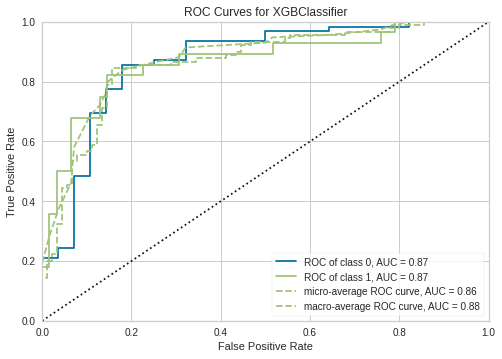

In [ ]:
# Plotar o desempenho do modelo
pc.plot_model(tuned_xgboost)

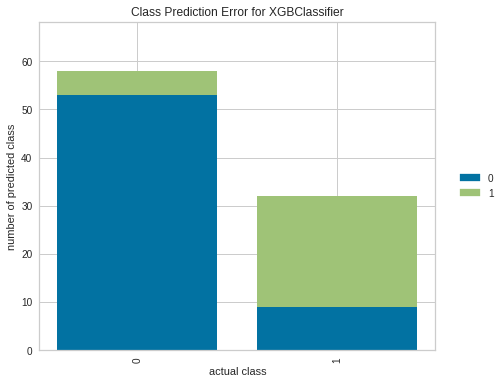

In [ ]:
# Plotar o erro predito
pc.plot_model(tuned_xgboost, plot="error")

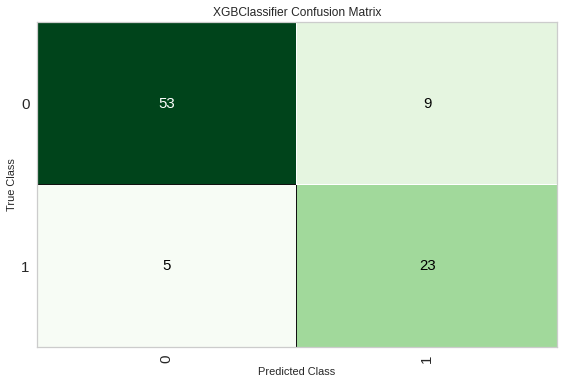

In [ ]:
# Plotar a matrix de confusão
pc.plot_model(tuned_xgboost, plot="confusion_matrix")

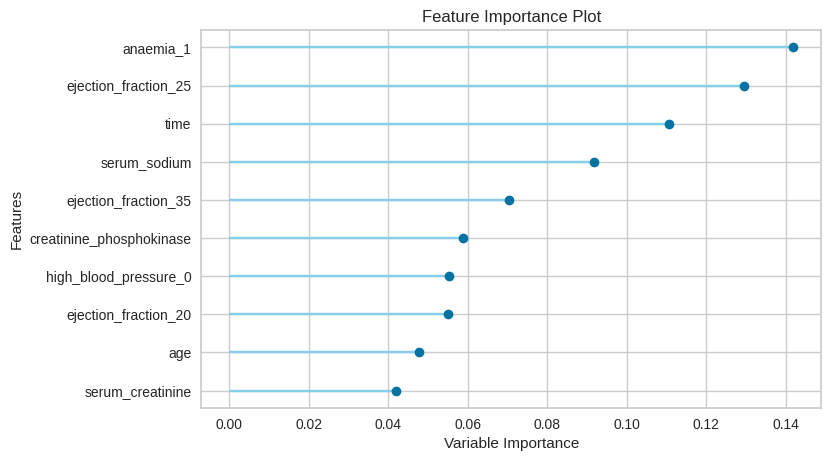

In [ ]:
# Plotar as features mais importantes
pc.plot_model(tuned_xgboost, plot="feature")

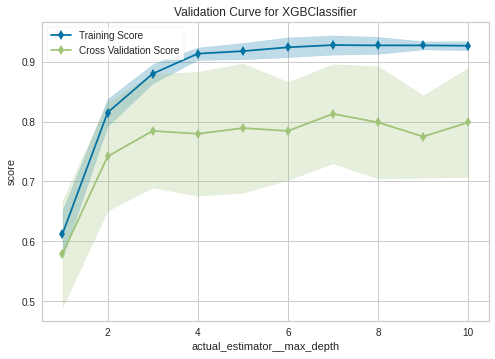

In [ ]:
# Plotar a curva de validação
pc.plot_model(tuned_xgboost, plot="vc")

In [ ]:
# Otimizar o treshold para o modelo
pc.optimize_threshold(tuned_xgboost, true_negative=1500, false_negative=5000)

Optimized Probability Threshold: 0.9999 | Optimized Cost Function: 233000


0.9999

In [ ]:
# Salvando o modelo em pickle
pc.save_model(tuned_xgboost, "xgboost_saved_model_02122021")

Transformation Pipeline and Model Succesfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       id_columns=[],
                                       ml_usecase='classification',
                                       numerical_features=[],
                                       target='DEATH_EVENT', time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 numeric_...
                                interaction_constraints='', learning_rate=0.293,
                                max_delta_step=0, max_depth=7,
                                min_child_weight=3, missing=nan,
                                monotone_constraints='()', n_esti

In [ ]:
# Abrindo o modelo salvo novamente
loaded_xgb = pc.load_model("xgboost_saved_model_02122021")

Transformation Pipeline and Model Successfully Loaded


     |████████████████████████████████| 358kB 5.5MB/s 
  Created wheel for shap: filename=shap-0.38.1-cp36-cp36m-linux_x86_64.whl size=489409 sha256=77ece0415f2ded09fe5976c2efaae9fe0ed57b009042c412e441fd79b11dde93
  Stored in directory: /root/.cache/pip/wheels/a8/fb/e4/88012be41842b9be62ae18d82d1b1e880daf8539d1fef1fa00
Successfully built shap


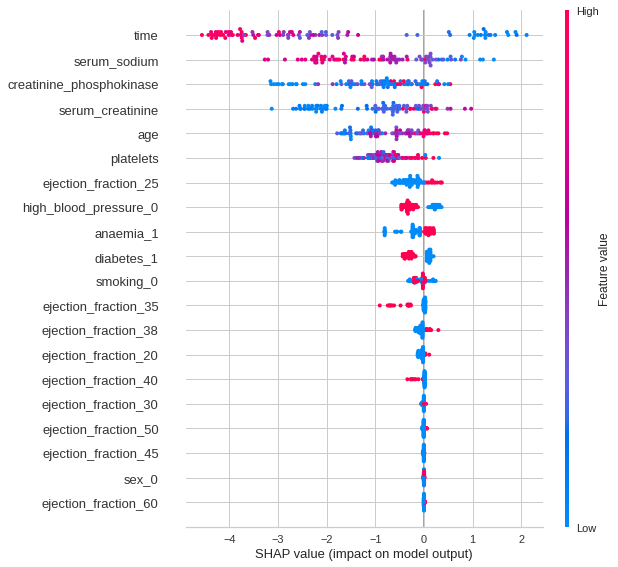

In [ ]:
# Interpretando o modelo
!pip install shap
pc.interpret_model(tuned_xgboost)

In [ ]:
# Finalizando o modelo para predição
final_xgb_model = pc.finalize_model(tuned_xgboost)

In [ ]:
# Criar um dado para predição
data_df.loc[1].to_dict()

{'DEATH_EVENT': 1.0,
 'age': 55.0,
 'anaemia': 0.0,
 'creatinine_phosphokinase': 7861.0,
 'diabetes': 0.0,
 'ejection_fraction': 38.0,
 'high_blood_pressure': 0.0,
 'platelets': 263358.03,
 'serum_creatinine': 1.1,
 'serum_sodium': 136.0,
 'sex': 1.0,
 'smoking': 0.0,
 'time': 6.0}

In [ ]:
data_df.loc[200].to_dict()

{'DEATH_EVENT': 0.0,
 'age': 63.0,
 'anaemia': 1.0,
 'creatinine_phosphokinase': 1767.0,
 'diabetes': 0.0,
 'ejection_fraction': 45.0,
 'high_blood_pressure': 0.0,
 'platelets': 73000.0,
 'serum_creatinine': 0.7,
 'serum_sodium': 137.0,
 'sex': 1.0,
 'smoking': 0.0,
 'time': 186.0}

In [ ]:
data_df.agg([min, max])

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
min,40.0,0,23,0,14,0,25100.0,0.5,113,0,0,4,0
max,95.0,1,7861,1,80,1,850000.0,9.4,148,1,1,285,1


In [ ]:
new_data = {
    'age': [48.0],
    "anaemia": [0.0],
    "creatinine_phosphokinase": [1002.0],
    "diabetes": [1.0],
    "ejection_fraction": [20.0],
    "high_blood_pressure": [0.0],
    "platelets": [368000.0],
    "serum_creatinine": [2.0],
    "serum_sodium": [120],
    "sex": [1],
    "smoking": [1.0],
    "time": [200.0]
}
new_df = pd.DataFrame.from_dict(new_data)
new_df

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
0,48.0,0.0,1002.0,1.0,20.0,0.0,368000.0,2.0,120,1,1.0,200.0


In [ ]:
# Fazendo predição com o modelo finalizado
prediction = pc.predict_model(final_xgb_model, data=new_df)
print(prediction)

    age  anaemia  creatinine_phosphokinase  ...   time  Label   Score
0  48.0      0.0                    1002.0  ...  200.0      1  0.8349

[1 rows x 14 columns]


# Referências

* [Machine Learning with PyCaret and Python](https://www.youtube.com/watch?v=cnxOGWtwdv8&feature=emb_title)
* [Pycaret documentation](https://pycaret.org/)
* [Talks # 7: Moez Ali: Machine learning with PyCaret](https://www.youtube.com/watch?v=jlW5kRBwcb0)